# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Based on the API KEY guidance, the temperature unit is Kelvin by default.

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [3]:
cities

['adamstown',
 'puerto baquerizo moreno',
 'san antonio de pale',
 'bethel',
 'waitangi',
 'klyuchi',
 'petropavlovsk-kamchatsky',
 'port lincoln',
 'kapit',
 'edinburgh of the seven seas',
 'tchibanga',
 'port elizabeth',
 'udachny',
 'morar',
 'bengkulu',
 'puerto natales',
 'taiohae',
 'buala',
 'bairnsdale',
 'vanino',
 'hamina',
 'vilshofen',
 'anuradhapura',
 'tianpeng',
 'hasaki',
 'cuyo',
 'invercargill',
 'ilulissat',
 'susuman',
 'arraial do cabo',
 'grytviken',
 'maumere',
 'whitehorse',
 'masons bay',
 'swakopmund',
 'strathfieldsaye',
 'jalai nur',
 'albany',
 'bryne',
 'new norfolk',
 'touros',
 'geneseo',
 'port-aux-francais',
 'fale old settlement',
 'lebu',
 'severo-yeniseyskiy',
 'seven pagodas',
 'tokar',
 'ormara',
 'jamestown',
 "sokal'",
 'hermanus',
 'general pico',
 'berlin',
 'purpe',
 'port mathurin',
 'ushuaia',
 'marsh harbour',
 'khorugh',
 'kone',
 'cable beach',
 'mount pearl',
 'douentza',
 'tolanaro',
 'georgetown',
 'as sulayyil',
 'chegdomyn',
 'west 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | puerto baquerizo moreno
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | kapit
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | tchibanga
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | morar
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | bairnsdale
Processing Record 20 of Set 1 | vanino
Processing Record 21 of Set 1 | hami

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Max Temp (C)'] = city_data_df['Max Temp'] - 273.15

# Show Record Count
city_data_df.count()

City            572
Lat             572
Lng             572
Max Temp        572
Humidity        572
Cloudiness      572
Wind Speed      572
Country         572
Date            572
Max Temp (C)    572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,adamstown,-25.0660,-130.1015,291.11,61,14,10.53,PN,1691717317,17.96
1,puerto baquerizo moreno,-0.9000,-89.6000,297.06,83,62,5.91,EC,1691717317,23.91
2,san antonio de pale,-1.4014,5.6325,296.55,87,98,4.55,GQ,1691717318,23.40
3,bethel,41.3712,-73.4140,294.62,86,100,1.24,US,1691717039,21.47
4,waitangi,-43.9535,-176.5597,285.27,89,100,3.58,NZ,1691717318,12.12


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,291.11,61,14,10.53,PN,1691717317,17.96
1,puerto baquerizo moreno,-0.9000,-89.6000,297.06,83,62,5.91,EC,1691717317,23.91
2,san antonio de pale,-1.4014,5.6325,296.55,87,98,4.55,GQ,1691717318,23.40
3,bethel,41.3712,-73.4140,294.62,86,100,1.24,US,1691717039,21.47
4,waitangi,-43.9535,-176.5597,285.27,89,100,3.58,NZ,1691717318,12.12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

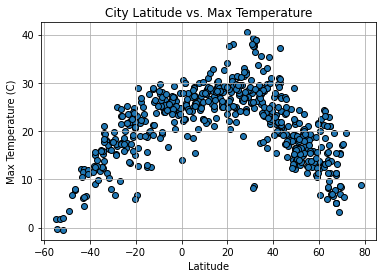

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

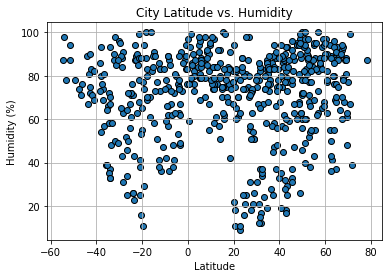

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

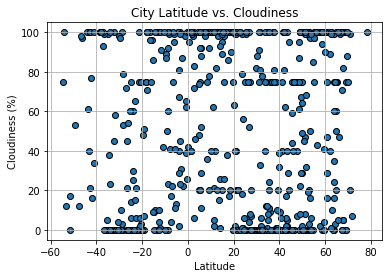

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

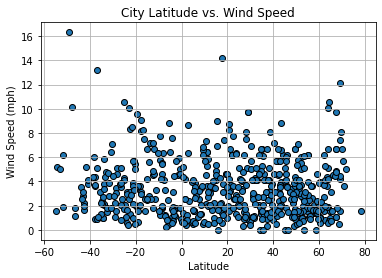

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
import scipy.stats as st

def create_linear_regression_plot(data, x_col, y_col, x_label, y_label, title, annotate_pos='upper left', color='red'):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(data[x_col], data[y_col])

    # Calculate regression line values
    regress = data[x_col] * slope + intercept

    # Create scatter plot
    plt.scatter(data[x_col], data[y_col])

    # Plot regression line
    plt.plot(data[x_col], regress, color=color)

    # Add regression equation as annotation
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    plt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color=color)
    plt.annotate(r_value_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, color=color)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter data for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
3,bethel,41.3712,-73.4140,294.62,86,100,1.24,US,1691717039,21.47
5,klyuchi,52.2667,79.1667,288.36,89,100,6.00,RU,1691717318,15.21
6,petropavlovsk-kamchatsky,53.0452,158.6483,292.48,52,20,2.00,RU,1691717318,19.33
8,kapit,2.0167,112.9333,298.98,90,98,0.38,MY,1691717318,25.83
12,udachny,66.4167,112.4000,292.84,64,99,4.54,RU,1691717100,19.69


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,291.11,61,14,10.53,PN,1691717317,17.96
1,puerto baquerizo moreno,-0.9000,-89.6000,297.06,83,62,5.91,EC,1691717317,23.91
2,san antonio de pale,-1.4014,5.6325,296.55,87,98,4.55,GQ,1691717318,23.40
4,waitangi,-43.9535,-176.5597,285.27,89,100,3.58,NZ,1691717318,12.12
7,port lincoln,-34.7333,135.8667,285.73,66,99,2.40,AU,1691717318,12.58


###  Temperature vs. Latitude Linear Regression Plot

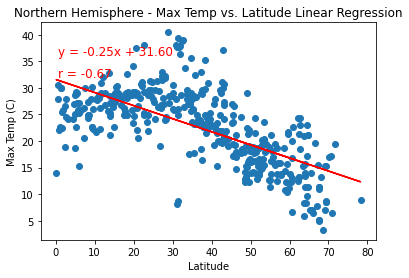

In [16]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp (C)', 'Latitude', 'Max Temp (C)', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')


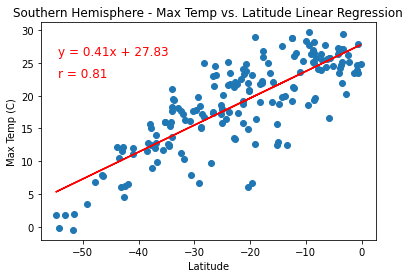

In [17]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp (C)', 'Latitude', 'Max Temp (C)', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The results reveal a strong negative linear relationship between latitude and max temperature in northern hemisphere, r is -0.67, and a strong postive relationship in southern hemisphere, r is 0.81.

### Humidity vs. Latitude Linear Regression Plot

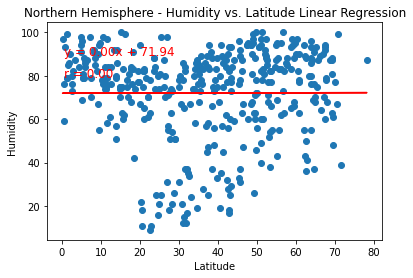

In [18]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude Linear Regression')

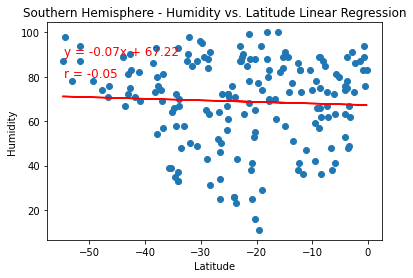

In [19]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The results reveal no correlation between latitude and humidity in northern hemisphere, r is 0.00, and no correlation in southern hemisphere, r is -0.05, which is too small.

### Cloudiness vs. Latitude Linear Regression Plot

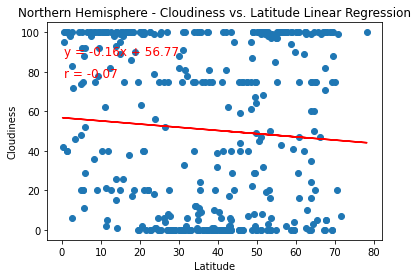

In [20]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

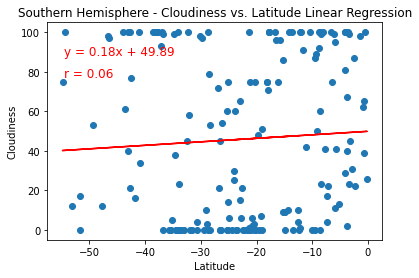

In [21]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The results don't reveal any strong correlation between latitude and cloudiness in both northern hemisphere (r = -0.07) and southern hemisphere (r = 0.06).

### Wind Speed vs. Latitude Linear Regression Plot

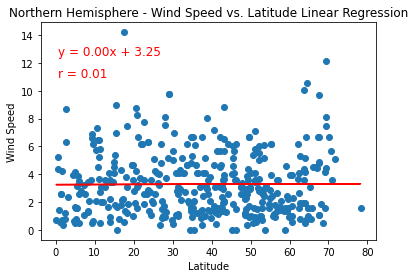

In [22]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

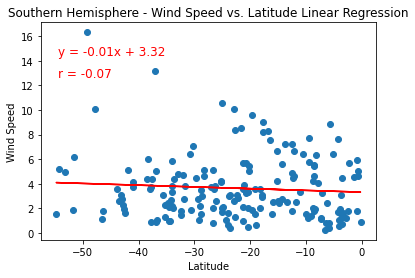

In [23]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The results don't reveal any strong correlation between latitude and wind speed in both northern hemisphere (r = 0.01) and southern hemisphere (r = -0.07).